In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data = pd.read_csv('C:\\Users\\rashi\\OneDrive\\Desktop\\Oasis Infobyte\\spamDetection\\spam.csv', encoding='ISO-8859-1')

In [3]:
X = data['v2']
y = data['v1']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [6]:
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)


MultinomialNB()

In [7]:
predictions = classifier.predict(X_test_vectorized)


In [8]:
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

In [9]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.9838565022421525
Confusion Matrix:
[[963   2]
 [ 16 134]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



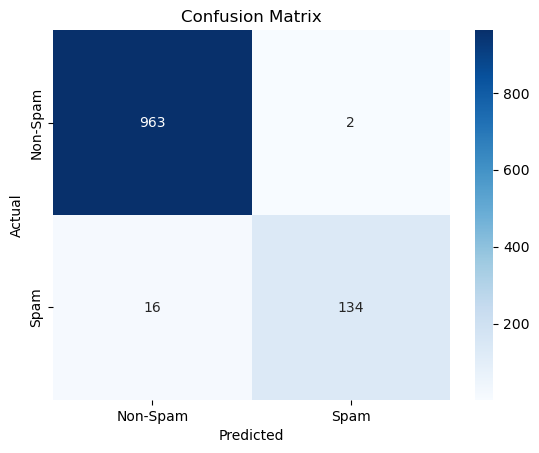

In [10]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [11]:
new_emails = ["Get a special discount on our latest products!", "Important notice: Verify your account now!"]
new_emails_vectorized = vectorizer.transform(new_emails)
new_predictions = classifier.predict(new_emails_vectorized)

In [12]:
for email, prediction in zip(new_emails, new_predictions):
    print(f"Email: {email}\nPredicted label: {prediction}\n{'-'*40}")

Email: Get a special discount on our latest products!
Predicted label: spam
----------------------------------------
Email: Important notice: Verify your account now!
Predicted label: spam
----------------------------------------
